In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
gender_df=pd.read_csv("gender_submission.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [9]:
concat=pd.concat([gender_df,test_df],ignore_index=True)
concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,894,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
831,1305,NaN,3.0,"Spector, Mr. Woolf",male,NaN,0.0,0.0,A.5. 3236,8.0500,NaN,S
832,1306,NaN,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.9000,C105,C
833,1307,NaN,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0.0,0.0,SOTON/O.Q. 3101262,7.2500,NaN,S
834,1308,NaN,3.0,"Ware, Mr. Frederick",male,NaN,0.0,0.0,359309,8.0500,NaN,S


C:\Users\Msi\AppData\Local\Temp\ipykernel_26156\1592914746.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
C:\Users\Msi\AppData\Local\Temp\ipykernel_26156\1592914746.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

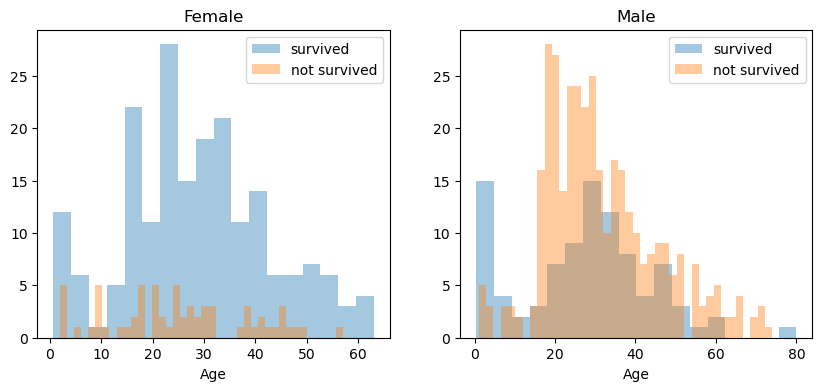

In [10]:
#Age and gender

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\miniconda\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


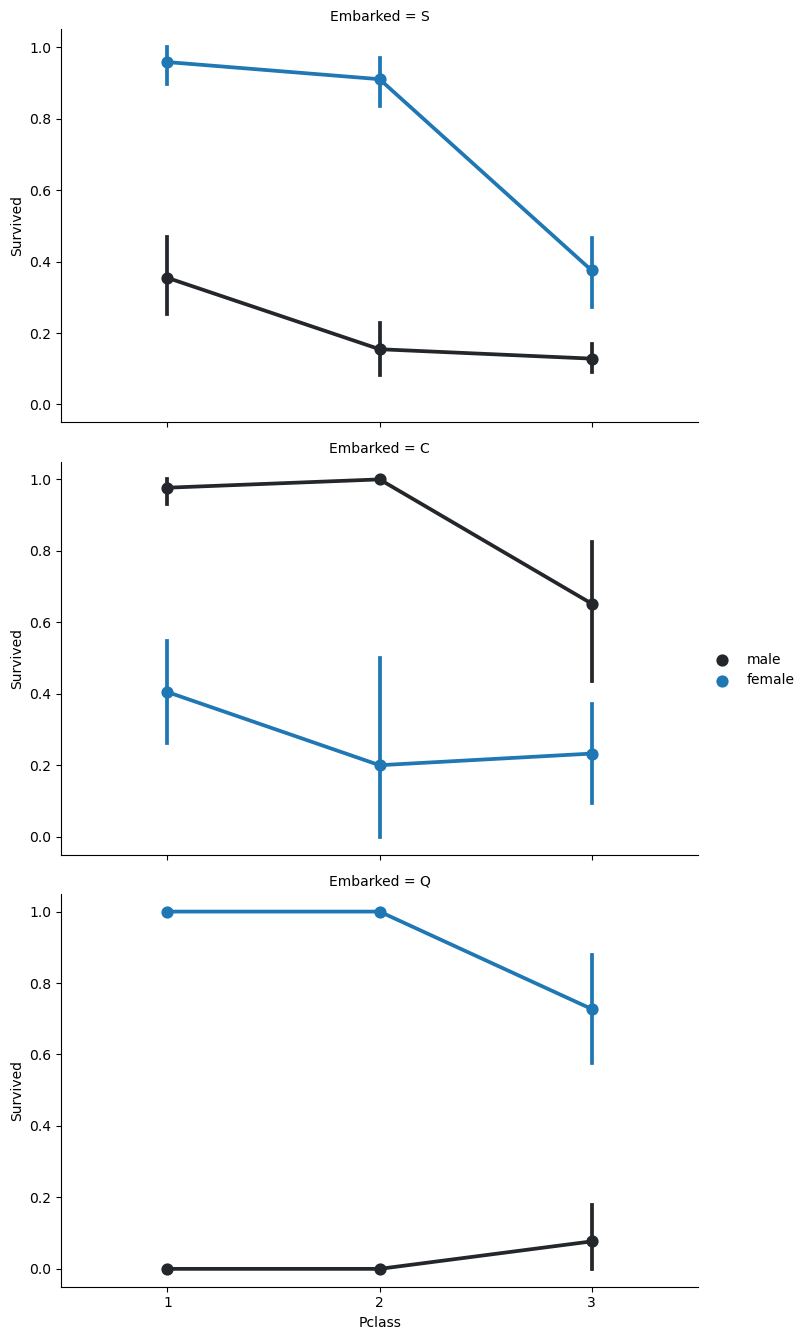

In [11]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<Axes: xlabel='Pclass', ylabel='Survived'>

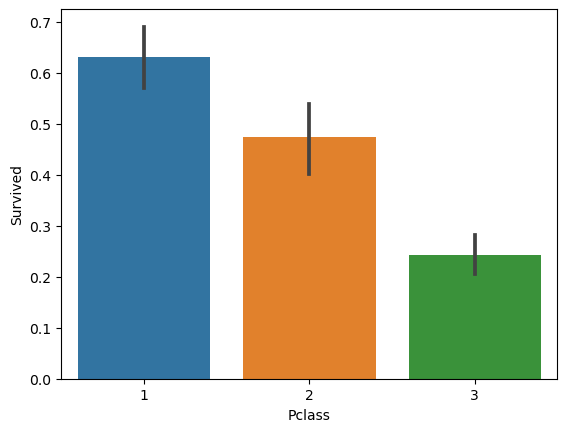

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

C:\miniconda\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


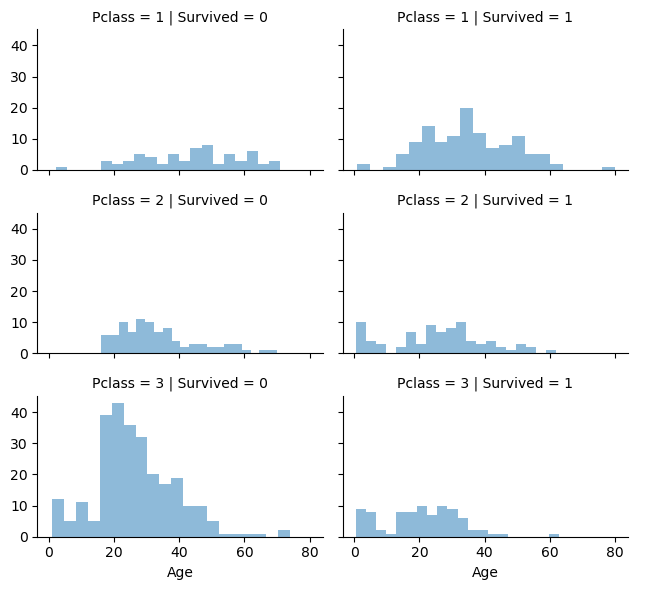

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.0, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [14]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

In [15]:
#data preprocessing 
train_df = train_df.drop(['PassengerId'], axis=1)

In [16]:
#missing data for the cabin:

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [17]:
#missing data for age 

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [18]:
#Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 83.7+ KB


In [21]:
#we see that some of categorie have not an int type so we'll 
#we begin with the column Fare
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
#we after change for the column 

print("Columns before drop:")
print(train_df.columns)
print(test_df.columns)

train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

print("Train DataFrame Info:")
print(train_df.info())

print("\nTest DataFrame Info:")
print(test_df.info())

print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)

modified_train_df = train_df.drop(['Name'], axis=1)
modified_test_df = test_df.drop(['Name'], axis=1)



Columns before drop:
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck'],
      dtype='object')
Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    int32  
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    int32  
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [24]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [25]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [26]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    int64  
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Fare       891 non-null    int32  
 8   Embarked   891 non-null    object 
 9   relatives  891 non-null    int64  
 10  not_alone  891 non-null    int32  
 11  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(6), object(2)
memory usage: 73.2+ KB


In [28]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    int64  
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Fare       891 non-null    int32  
 8   Embarked   891 non-null    int64  
 9   relatives  891 non-null    int64  
 10  not_alone  891 non-null    int32  
 11  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(7), object(1)
memory usage: 73.2+ KB


In [30]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,0,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7,0,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53,0,1,0,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8,0,0,1,8
5,0,3,"Moran, Mr. James",0,28.0,0,0,8,2,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51,0,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21,0,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11,0,2,0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30,1,1,0,8


In [31]:


data = [train_df, test_df]

for dataset in data:
    # Check for NaN values before processing
    print("NaN values in 'Age' column before processing:", dataset['Age'].isnull().sum())
    
    # Handle missing values by filling them with a placeholder value, e.g., -1
    dataset['Age'].fillna(-1, inplace=True)

    # Binning logic
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6
    
    # Convert 'Age' to integers
    dataset['Age'] = dataset['Age'].astype(int)

    # Check unique values after processing
    print("Unique values in 'Age' column after processing:", dataset['Age'].unique())

train_df['Age'].value_counts()


NaN values in 'Age' column before processing: 0
Unique values in 'Age' column after processing: [2 5 3 4 6 0 1]
NaN values in 'Age' column before processing: 86
Unique values in 'Age' column after processing: [5 6 3 2 1 4 0]


Age
4    303
6    150
3    106
5    101
2     92
1     71
0     68
Name: count, dtype: int64

In [32]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7,0,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,71,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7,0,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,53,0,1,0,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,8,0,0,1,8
5,0,3,"Moran, Mr. James",0,4,0,0,8,2,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,51,0,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,21,0,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,11,0,2,0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,30,1,1,0,8


In [33]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5

    # Fill NaN values with the median of the 'Fare' column
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

    # Ensure there are no infinite values
    dataset['Fare'] = dataset['Fare'].replace([np.inf, -np.inf], dataset['Fare'].median())

    # Convert 'Fare' to integers
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df['Fare'].value_counts()



Fare
0    241
2    223
1    216
3    158
4     44
5      9
Name: count, dtype: int64

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name       891 non-null    object
 3   Sex        891 non-null    int64 
 4   Age        891 non-null    int32 
 5   SibSp      891 non-null    int64 
 6   Parch      891 non-null    int64 
 7   Fare       891 non-null    int32 
 8   Embarked   891 non-null    int64 
 9   relatives  891 non-null    int64 
 10  not_alone  891 non-null    int32 
 11  Deck       891 non-null    int32 
dtypes: int32(4), int64(7), object(1)
memory usage: 69.7+ KB


In [35]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,0,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,3,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,0,0,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,3,0,1,0,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,1,0,0,1,8
5,0,3,"Moran, Mr. James",0,4,0,0,1,2,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,3,0,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,2,0,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,1,0,2,0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,2,1,1,0,8


In [36]:
#creating new features 
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [37]:
data = [train_df, test_df]

for dataset in data:
    # Create a new column 'relatives' by adding 'SibSp' and 'Parch'
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

    # Avoid division by zero, add 1 to relatives
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    
    # Convert 'Fare_Per_Person' to integer
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

# Display the last 10 rows of the training set
train_df.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class,Fare_Per_Person
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,0,1,0,8,6,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,3,1,1,0,3,5,1
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,0,0,0,1,8,9,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,3,0,1,0,3,5,1
4,0,3,"Allen, Mr. William Henry",0,5,0,0,1,0,0,1,8,15,1
5,0,3,"Moran, Mr. James",0,4,0,0,1,2,0,1,8,12,1
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,3,0,0,1,5,6,3
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,2,0,4,0,8,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,1,0,2,0,8,9,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,2,1,1,0,8,2,1


In [38]:
train_df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class,Fare_Per_Person
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,0,1,0,8,6,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,3,1,1,0,3,5,1
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,0,0,0,1,8,9,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,3,0,1,0,3,5,1
4,0,3,"Allen, Mr. William Henry",0,5,0,0,1,0,0,1,8,15,1
5,0,3,"Moran, Mr. James",0,4,0,0,1,2,0,1,8,12,1
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,3,0,0,1,5,6,3
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,2,0,4,0,8,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,1,0,2,0,8,9,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,2,1,1,0,8,2,1


In [39]:
train_df.drop("Name",axis=1,inplace=True)
test_df.drop("Name",axis=1,inplace=True)

In [40]:
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,6,0
1,1,1,1,5,1,0,3,1,1,0,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,9,0
3,1,1,1,5,1,0,3,0,1,0,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,15,1
5,0,3,0,4,0,0,1,2,0,1,8,12,1
6,0,1,0,6,0,0,3,0,0,1,5,6,3
7,0,3,0,0,3,1,2,0,4,0,8,0,0
8,1,3,1,3,0,2,1,0,2,0,8,9,0
9,1,2,1,1,1,0,2,1,1,0,8,2,1


In [41]:
#buiding machin learning 
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X_train and Y_train are your features and target variable
# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Create a SimpleImputer to fill missing values with the mean (you can change the strategy if needed)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the Logistic Regression model on the imputed data
logreg = LogisticRegression()
logreg.fit(X_train_imputed, Y_train)

# Make predictions on the test set
Y_pred = logreg.predict(X_test_imputed)

# Evaluate the model accuracy
acc_log = round(logreg.score(X_test_imputed, Y_test) * 100, 2)
print(f"Accuracy: {acc_log}%")


Accuracy: 82.19%


C:\miniconda\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#buiding machin learning 
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

# Assuming X_train and Y_train are your features and target variable
# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Create a SimpleImputer to fill missing values with the mean (you can change the strategy if needed)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test_imputed)

# Evaluate the model accuracy
acc_log = round(best_model.score(X_test_imputed, Y_test) * 100, 2)
print(f"Accuracy: {acc_log}%")


C:\miniconda\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\miniconda\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 81.01%


C:\miniconda\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\miniconda\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Trace

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import joblib

#trained your model
X, y = make_classification(n_samples=100, n_features=4, random_state=42)
model = LogisticRegression()
model.fit(X, y)

# Save the trained model to a file
joblib.dump(model, 'trained_titanic_model.pkl')


['trained_titanic_model.pkl']